## Notes

Matrix dimensions:
- emissions: 5
- concentration: 5
- forcings: 5
- cummins: 4
- airborne_emissions: 5

In [76]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Input data
file_path = 'data/climate/pos_generative.csv'

# Read the CSV into a pandas dataframe without headers
df = pd.read_csv(file_path, header=None)

# Species list
species = ["CO2_FFI", "CO2_AFOLU", "CO2", "CH4", "N2O"]

# Construct new column names
emissions_cols = [f"{s}_emissions" for s in species]
concentrations_cols = [f"{s}_concentration" for s in species]
forcings_cols = [f"{s}_forcing" for s in species]
temp_cols = ['atmospheric_temp', 'sea_layer1_temp', 'sea_layer2_temp', 'sea_layer3_temp']
airborne_emissions_cols = [f"{s}_airborne_emissions" for s in species]

# Combine all new column names
new_column_names = emissions_cols + concentrations_cols + forcings_cols + temp_cols + airborne_emissions_cols

# Rename columns in df
df.columns = new_column_names

# Add run and year columns
df['run'] = (df.index // 351) + 1
df['year'] = (df.index % 351) + 1750

print(df.head())

   CO2_FFI_emissions  CO2_AFOLU_emissions  CO2_emissions  CH4_emissions  \
0           0.009506             0.297465       0.306970      19.019783   
1           0.009506             0.302937       0.312443      18.915109   
2           0.009510             0.308510       0.318020      18.889712   
3           0.009510             0.314186       0.323696      19.121377   
4           0.009514             0.319966       0.329480      19.509061   

   N2O_emissions  CO2_FFI_concentration  CO2_AFOLU_concentration  \
0       0.086022                      0                        0   
1       0.087647                      0                        0   
2       0.089303                      0                        0   
3       0.090990                      0                        0   
4       0.092709                      0                        0   

   CO2_concentration  CH4_concentration  N2O_concentration  ...  \
0         278.300000         729.200000         270.100000  ...   
1     

In [78]:
# atmospheric_temp vs. CH4_airborne_emissions
df.to_csv('visualisations/data/climate_data.csv', index=False)

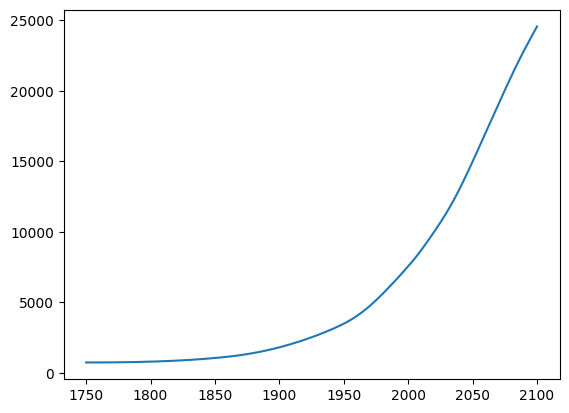

In [79]:
i = 13
plt.plot(df[df['run'] == i]['year'], df[df['run'] == i]['CH4_concentration'])

In [80]:
# Select a particular run
df = df[df['run'] == 25]

In [81]:
# Select all emissions columns for CO2 FFI
# df.filter(like='CO2_FFI_emissions')
df.loc[:, ['year'] + df.filter(like='CO2_FFI_emissions').columns.tolist()]

,year,CO2_FFI_emissions
8424,1750,0.009506
8425,1751,0.009506
8426,1752,0.009510
8427,1753,0.009510
8428,1754,0.009514
...,...,...
8770,2096,-5951.474172
8771,2097,-5893.293214
8772,2098,-5835.112276
8773,2099,-5776.931358


In [82]:
# All concentration columns
df.filter(like='_temp')

,atmospheric_temp,sea_layer1_temp,sea_layer2_temp,sea_layer3_temp
8424,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
8425,0.000636,-4.428441e-04,-1.431590e-05,-1.268179e-07
8426,0.001138,-4.310255e-03,-1.785141e-04,-2.360860e-06
8427,0.001599,-3.503727e-02,-1.541769e-03,-2.307179e-05
8428,0.002089,-2.767146e-01,-1.233732e-02,-1.912139e-04
...,...,...,...,...
8770,3.456653,-3.514374e+305,-1.571723e+304,-2.462498e+302
8771,3.464969,-2.759860e+306,-1.234284e+305,-1.933815e+303
8772,3.473138,-2.167336e+307,-9.692911e+305,-1.518637e+304
8773,3.481165,-1.702022e+308,-7.611904e+306,-1.192595e+305


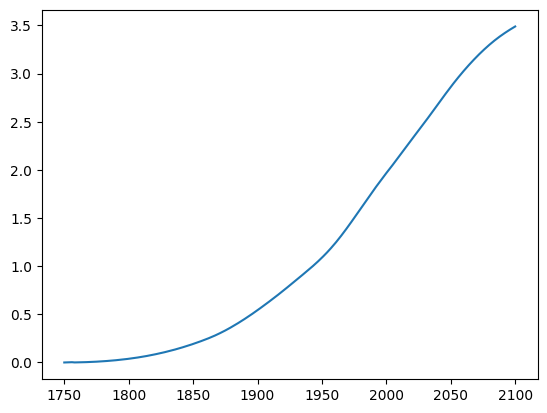

In [83]:
# Example plot
plt.plot(df['year'], df['atmospheric_temp'])

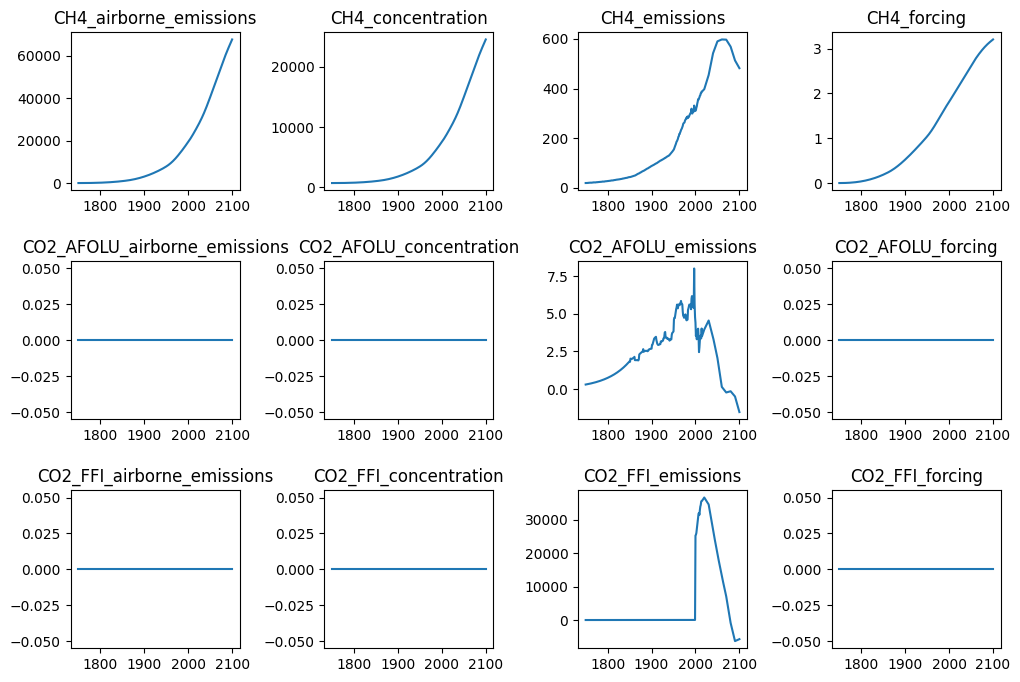

In [84]:
# Subplots of first 12 columns
m, n = 3, 4
fig, axs = plt.subplots(m, n, figsize=(12,8))
columns = df.columns.difference(['year', 'run']) # exclude 'year' column for plotting
for i in range(m):
    for j in range(n):
        ax = axs[i][j]
        column = columns[i * n + j]
        ax.set_title(column)
        ax.plot(df['year'], np.where(np.abs(df[column]) < 1.0e+307, df[column], np.NaN))

plt.subplots_adjust(wspace=0.5, hspace=0.45)
plt.show()

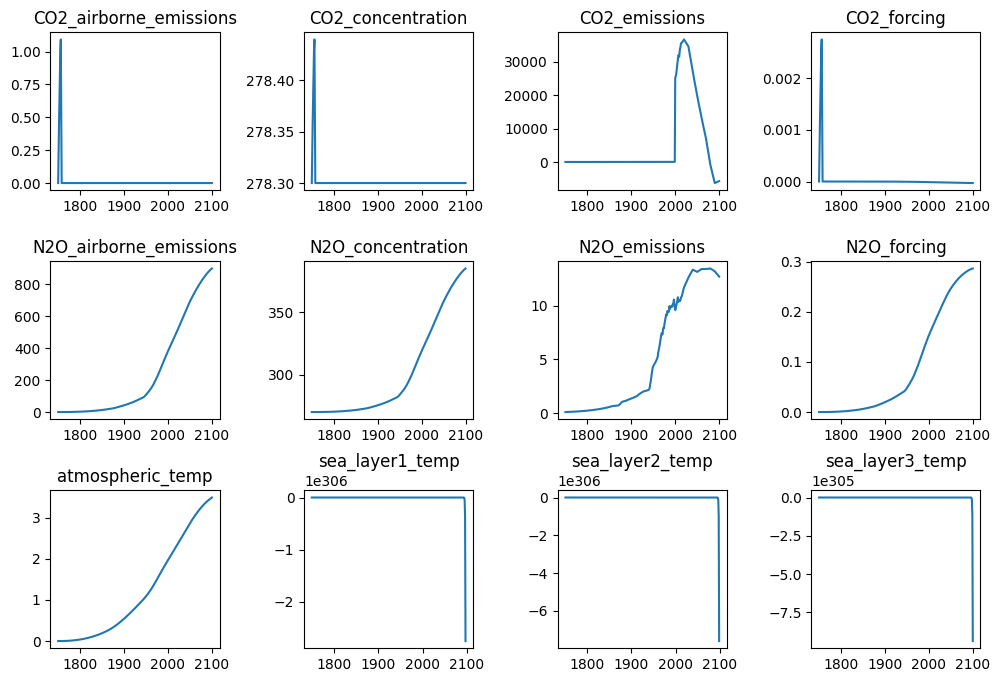

In [85]:
# Subplots of last 12 columns
m, n = 3, 4
fig, axs = plt.subplots(m, n, figsize=(12,8))
columns = df.columns.difference(['year', 'run']) # exclude 'year' column for plotting
for i in range(m):
    for j in range(n):
        ax = axs[i][j]
        column = columns[12 + i * n + j]
        ax.set_title(column)
        ax.plot(df['year'], np.where(np.abs(df[column]) < 1.0e+307, df[column], np.NaN))

plt.subplots_adjust(wspace=0.5, hspace=0.45)
plt.show()

## Brainstorm

### JS Visualization Libraries
- Three.js
    - ideal for custom visualizations
- Plotly.js
    - good for data science, quick graphs
- D3.js
    - more known for 2d, but can make 3d
    - suitable for complex, interactive visualizations where you also need to incorporate extensive 2D components
- ShaderGraph
    - library for linking together GLSL snippets into stand-alone shaders


### People to Contact
- Prof E Wolff, ew428: https://www.esc.cam.ac.uk/directory/eric-wolff
- Shuckburgh: https://www.cst.cam.ac.uk/people/efs20
- Kolesnikov: https://www.ceenrg.landecon.cam.ac.uk/people/dr-sergey-kolesnikov
- Archibald: https://www.climatescience.cam.ac.uk/directory/alex.archibald

